## Dataset Arboles de Decision - Grupo 21

### Pasos de la actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [60]:
#cargar las librerias necesarias
import pandas as pd #maneja y analisa estructura de datos.
import numpy as np # calculo numerico y el analisis de datos
import seaborn as sns # creacion graficos estadisticos
import matplotlib.pyplot as plt # crea graficos en 2 dimensiones

# librerias para implementar modelo de ciencia de datos
from sklearn import tree
from sklearn.model_selection import train_test_split # de sklearn me importa train_test
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score



In [61]:
# cargamos el dataset y mostramos las 5 primeras filas
Dataset = pd.read_csv("./winequality-red.csv")
Dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [62]:
Dataset.shape  # nos muestra la dimension del dataset

(1599, 12)

In [63]:
Dataset.describe() # me muestra las medidas estadisticas

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


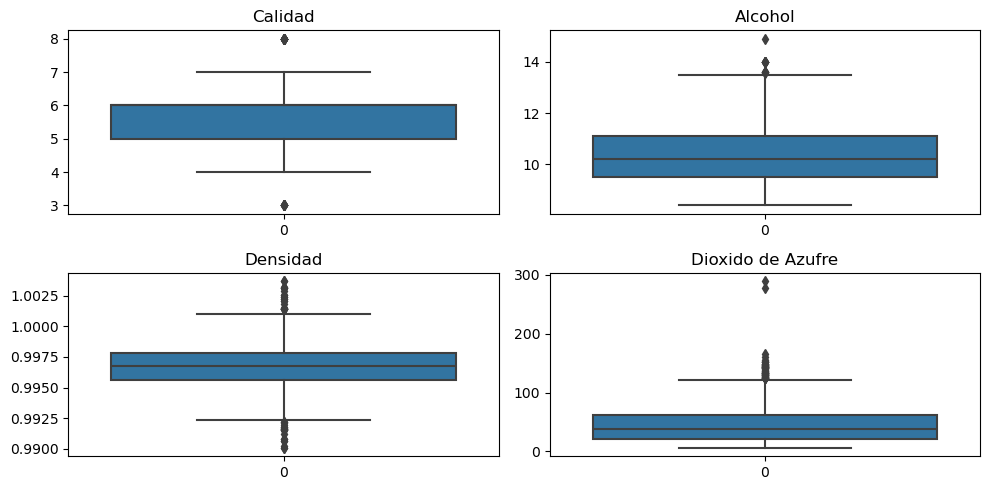

In [64]:
# Figuras de valores faltantes y atipicos
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(Dataset['quality'], ax = axs[0,0]).set_title("Calidad")
plt2 = sns.boxplot(Dataset['alcohol'], ax = axs[0,1]).set_title("Alcohol")
plt3 = sns.boxplot(Dataset['density'], ax = axs[1,0]).set_title("Densidad")
plt1 = sns.boxplot(Dataset['total sulfur dioxide'], ax = axs[1,1]).set_title("Dioxido de Azufre")

plt.tight_layout()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [65]:
Dataset.isna().sum()  #nos identifica si hay valores nulos

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

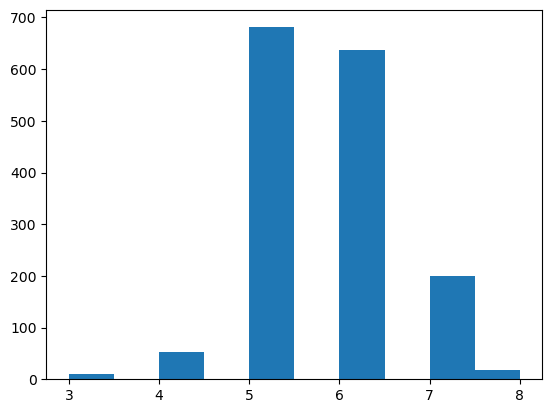

In [66]:
plt.hist(Dataset.quality) # nos muestra los tipos de calidad

Nos muestra las clases de calidad de vino, las calidades mas comunes son 5 y 6.

<Axes: xlabel='residual sugar', ylabel='citric acid'>

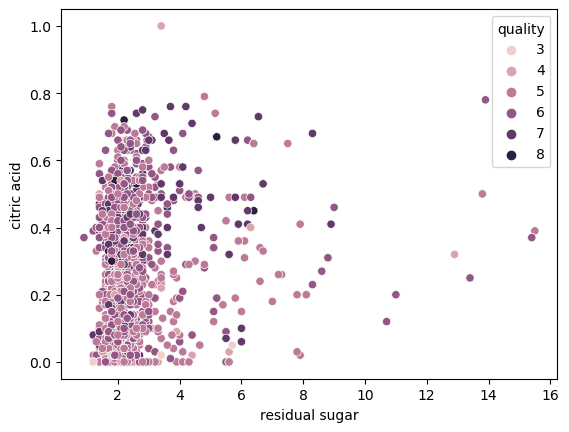

In [67]:
sns.scatterplot(x = "residual sugar", y = "citric acid", hue= "quality", data = Dataset)

<Axes: xlabel='alcohol', ylabel='pH'>

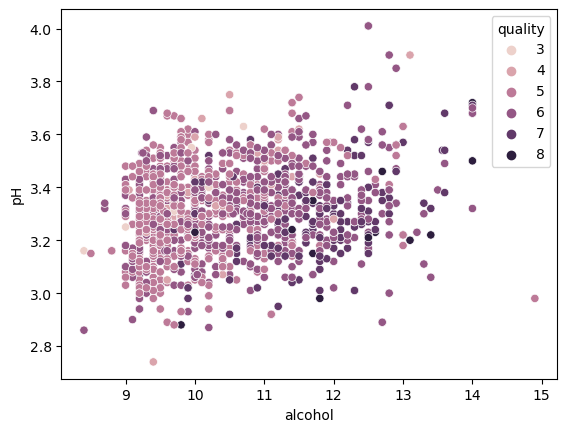

In [68]:
sns.scatterplot(x = "alcohol", y = "pH", hue= "quality", data = Dataset)

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [69]:
predictors_col = ["fixed acidity", "volatile acidity","citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide", "density","pH", "alcohol","sulphates"]
target_col = ['quality']

In [70]:
predictors = Dataset[predictors_col]
target = Dataset[target_col]

In [71]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,sulphates
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,9.4,0.56
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,9.8,0.68
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,9.8,0.65
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,9.8,0.58
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,9.4,0.56
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,10.5,0.58
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,11.2,0.76
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,11.0,0.75
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,10.2,0.71


In [72]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [73]:
corr = predictors.corr()  # halla la correlacion entre las variabls predictoras
corr
# cercanoa a 1, alta correlacion directa
#cercanos a -1 , alta correlacion inversa
# cercano a 0, baja o nula correlacion

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,sulphates
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,-0.061668,0.183006
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.202288,-0.260987
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.109903,0.312770
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.042075,0.005527
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,-0.221141,0.371260
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,-0.069408,0.051658
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,-0.205654,0.042947
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,-0.496180,0.148506
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,0.205633,-0.196648
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,1.000000,0.093595


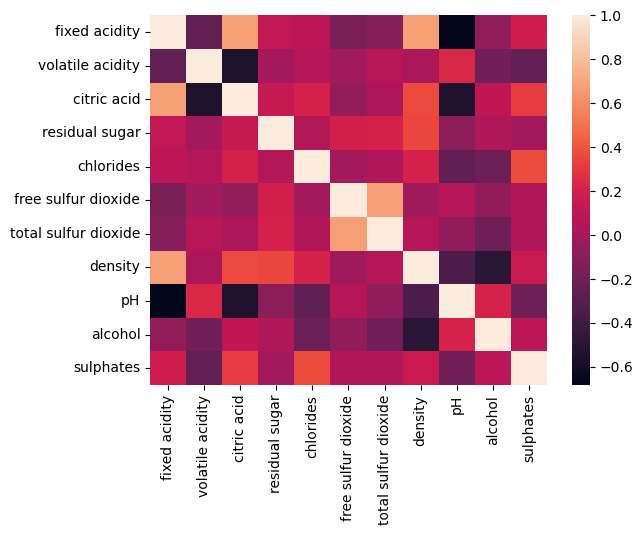

In [74]:
# mapa de calor
sns.heatmap(corr)
plt.show()

In [75]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state= 12)

## 5. Entrenar el modelo configurando los diferentes hiperparametros

In [76]:
tree = DecisionTreeClassifier(max_depth=10)  # me crea el arbol

In [77]:
arbol = tree.fit(x_train, y_train)  # empiezo a entrenar el arbol

// crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no
y_train = Dataset['top']
x_train = Dataset.drop(['top'], axis=1).values

#crear arbol de decision son profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion = 'quality',
                                            min_samples_split = 20,
                                            min_samples_leaf = 5,
                                            max_depth = 4,
                                            class_weight = {1:3.5})
decision_tree.fit(x_train, y_train)

// Mostrar el árbol de decisión
plt.figure(figsize=(10, 6))
tree.plot_tree(arbol, feature_names=x_train.columns, class_names=['No Top', 'Top'], filled=True)
plt.show()

In [78]:
predicciones = arbol.predict(x_test)

In [79]:
predicciones

array([5, 6, 4, 5, 6, 5, 5, 6, 5, 7, 5, 5, 6, 5, 6, 6, 6, 7, 5, 5, 5, 5,
       7, 6, 6, 6, 5, 6, 6, 5, 5, 7, 6, 6, 5, 6, 7, 6, 6, 5, 5, 5, 5, 7,
       5, 6, 6, 6, 6, 8, 5, 5, 6, 5, 6, 5, 5, 6, 5, 7, 6, 7, 5, 6, 6, 6,
       6, 7, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 4, 5, 7,
       6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 7, 6, 6, 7, 5, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 6, 6, 6, 5, 6, 7, 5, 6, 6, 7, 5, 6, 5, 7, 5, 6, 6, 5, 5,
       5, 6, 5, 6, 5, 6, 6, 7, 5, 5, 5, 7, 7, 6, 5, 7, 6, 6, 5, 6, 5, 6,
       6, 7, 3, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5,
       6, 5, 7, 6, 5, 5, 5, 7, 7, 7, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 6, 4, 6, 5, 5, 5, 6, 5, 7, 5, 6, 5, 6, 6, 5, 6,
       7, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5,
       5, 6, 6, 5, 7, 7, 5, 5, 5, 5, 6, 5, 7, 5, 6, 4, 5, 5, 5, 6, 5, 4,
       5, 6, 6, 6, 5, 5, 6, 6, 7, 6, 5, 5, 5, 4, 5, 5, 6, 5, 7, 6, 6, 5,
       6, 6, 7, 5, 5, 7, 5, 5, 5, 7, 6, 5, 5, 7, 5,

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [80]:
# Examina la matriz de confusion
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,2,0,0,0
4,0,1,4,3,1,0
5,1,3,112,53,5,0
6,0,4,52,92,18,1
7,0,0,7,18,21,0
8,0,0,0,0,2,0


In [81]:
accuracy = accuracy_score(y_test, predicciones)
print("Precision del modelo:", accuracy)

Precision del modelo: 0.565


- si aumentamos los datos de test al 30 %  nos da una precision de 0.60
- con 20 % de prueba nos da una precison de 0.63
- con un 25 % de prueba nos da 0.59 de precision

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

[Text(0.5437273139745916, 0.9545454545454546, 'x[9] <= 10.525\ngini = 0.649\nsamples = 1199\nvalue = [8, 44, 507, 471, 153, 16]'),
 Text(0.3583257713248639, 0.8636363636363636, 'x[6] <= 98.5\ngini = 0.55\nsamples = 735\nvalue = [6, 28, 426, 245, 28, 2]'),
 Text(0.22754083484573503, 0.7727272727272727, 'x[10] <= 0.575\ngini = 0.576\nsamples = 646\nvalue = [6, 28, 343, 240, 27, 2]'),
 Text(0.08586660617059891, 0.6818181818181818, 'x[9] <= 9.533\ngini = 0.497\nsamples = 243\nvalue = [4, 20, 162, 55, 2, 0]'),
 Text(0.029038112522686024, 0.5909090909090909, 'x[9] <= 9.075\ngini = 0.329\nsamples = 109\nvalue = [1, 5, 88, 14, 1, 0]'),
 Text(0.014519056261343012, 0.5, 'x[0] <= 7.8\ngini = 0.691\nsamples = 9\nvalue = [1, 2, 2, 4, 0, 0]'),
 Text(0.007259528130671506, 0.4090909090909091, 'x[10] <= 0.515\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2, 0, 0, 0]'),
 Text(0.003629764065335753, 0.3181818181818182, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.010889292196007259, 0.318181

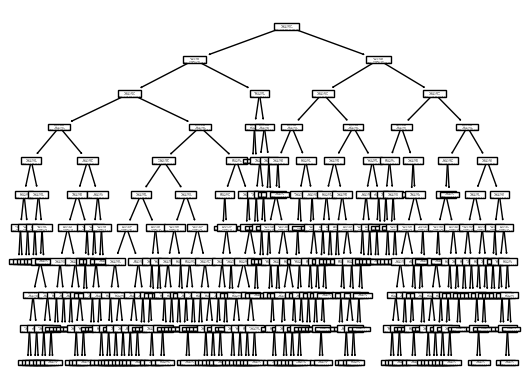

In [82]:
plot_tree(arbol)

## 8. Interpretar, analizar y documentar los resultados obtenidos.

Tras analizar los resultados obtenidos:

- Vemos que las calidades de vino mas recurrentes son 5 y 6. De 6.5 en adelante nos dice que es una calidad buena. 
- Se aprecia que se tienen mayores calidades de vino cuando el azucar residual esta de 2 a 4 y el acido citrico esta en el rango de 0 a 0.7.
- Observamos que un alcoho ideal para tener buena calidad esta en el rango de 9 a 12 y debe haber un PH de 3 a 3.6 para tener mejores calidades de vino.
    

